# 1. Introduction

In [54]:
import pandas as pd
import geopandas as gpd
#routes
data = gpd.read_file('fixed_data2.geojson')
data.head(5)

,ID,Segment ID,roadway_name,From,To,Direction,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,...,boro_name,boro_code,ctlabel,unique_id,sum_total_morning,sum_total_midday,sum_total_afternoon_rush,sum_total_evening,sum_total_night,geometry
0,62,147673,broadway,w 242 street,240 street,SB,255.0,209.0,149.0,148.0,...,Bronx,2,285,0,1927.0,3171.0,2347,1823.0,921.0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980..."
1,62,147673,broadway,w 242 street,240 street,SB,255.0,209.0,149.0,148.0,...,Bronx,2,351,1,1927.0,3171.0,2347,1823.0,921.0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980..."
2,62,158447,broadway,w 242 street,240 street,NB,255.0,209.0,149.0,148.0,...,Bronx,2,285,2,1921.0,3763.0,3132,2212.0,1047.0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980..."
3,62,158447,broadway,w 242 street,240 street,NB,255.0,209.0,149.0,148.0,...,Bronx,2,351,3,1921.0,3763.0,3132,2212.0,1047.0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980..."
4,62,255653,broadway,w 242 street,240 street,SB,87.0,86.0,78.0,56.0,...,Bronx,2,285,4,2370.0,4386.0,3673,2583.0,1296.0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980..."


# 2. Exploratory Data Analysis

In [56]:
# check null values
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17193 entries, 0 to 17192
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        17193 non-null  int64   
 1   Segment ID                17193 non-null  int64   
 2   roadway_name              17193 non-null  object  
 3   From                      17193 non-null  object  
 4   To                        17193 non-null  object  
 5   Direction                 17193 non-null  object  
 6   12:00-1:00 AM             17193 non-null  float64 
 7   1:00-2:00AM               17193 non-null  float64 
 8   2:00-3:00AM               17193 non-null  float64 
 9   3:00-4:00AM               17193 non-null  float64 
 10  4:00-5:00AM               17193 non-null  float64 
 11  5:00-6:00AM               17193 non-null  float64 
 12  6:00-7:00AM               17193 non-null  float64 
 13  7:00-8:00AM               17193 non-nu

In [55]:
data.dtypes

ID                             int64
Segment ID                     int64
roadway_name                  object
From                          object
To                            object
Direction                     object
12:00-1:00 AM                float64
1:00-2:00AM                  float64
2:00-3:00AM                  float64
3:00-4:00AM                  float64
4:00-5:00AM                  float64
5:00-6:00AM                  float64
6:00-7:00AM                  float64
7:00-8:00AM                  float64
8:00-9:00AM                  float64
9:00-10:00AM                 float64
10:00-11:00AM                float64
11:00-12:00PM                float64
12:00-1:00PM                   int64
1:00-2:00PM                    int64
2:00-3:00PM                    int64
3:00-4:00PM                    int64
4:00-5:00PM                    int64
5:00-6:00PM                    int64
6:00-7:00PM                    int64
7:00-8:00PM                    int64
8:00-9:00PM                    int64
9

In [29]:
data = data.rename(columns={"snow_priority":"drop","st_width": "snow_priority", "street_id": "st_width"})

In [30]:
data = data.drop(columns=['index_right','year','month','day'])

In [31]:
data['st_width'] = data['st_width'].astype(int)
data['bike_lane'] = data['bike_lane'].astype(int)

In [8]:
# Correlation of numeric variables
data[['morning_rush', 'midday', 'afternoon_rush', 'evening','night','total','sum_total_morning','sum_total_midday'
   ,'sum_total_afternoon_rush','sum_total_evening','sum_total_night','st_width','bike_lane']].corr()

,morning_rush,midday,afternoon_rush,evening,night,total,sum_total_morning,sum_total_midday,sum_total_afternoon_rush,sum_total_evening,sum_total_night,st_width,bike_lane
morning_rush,1.000000,0.940644,0.936491,0.895418,0.842041,0.962672,0.347470,0.284705,0.295070,0.288464,0.193075,-0.029054,0.000594
midday,0.940644,1.000000,0.985136,0.959198,0.884464,0.991289,0.306067,0.275778,0.279585,0.279860,0.199496,-0.018311,-0.007957
afternoon_rush,0.936491,0.985136,1.000000,0.954831,0.869108,0.987520,0.312742,0.275373,0.281247,0.278050,0.194479,-0.020823,-0.005036
evening,0.895418,0.959198,0.954831,1.000000,0.928101,0.973563,0.317245,0.287866,0.290164,0.303452,0.224619,-0.015544,-0.016765
night,0.842041,0.884464,0.869108,0.928101,1.000000,0.912262,0.275827,0.267292,0.265399,0.287186,0.243930,-0.001533,-0.014227
total,0.962672,0.991289,0.987520,0.973563,0.912262,1.000000,0.325723,0.286946,0.292186,0.294278,0.210676,-0.020108,-0.007616
sum_total_morning,0.347470,0.306067,0.312742,0.317245,0.275827,0.325723,1.000000,0.951317,0.962742,0.932853,0.764509,-0.176968,-0.061892
sum_total_midday,0.284705,0.275778,0.275373,0.287866,0.267292,0.286946,0.951317,1.000000,0.995534,0.983331,0.891557,-0.179431,-0.067048
sum_total_afternoon_rush,0.295070,0.279585,0.281247,0.290164,0.265399,0.292186,0.962742,0.995534,1.000000,0.975680,0.862741,-0.186904,-0.067875
sum_total_evening,0.288464,0.279860,0.278050,0.303452,0.287186,0.294278,0.932853,0.983331,0.975680,1.000000,0.922013,-0.154673,-0.066470


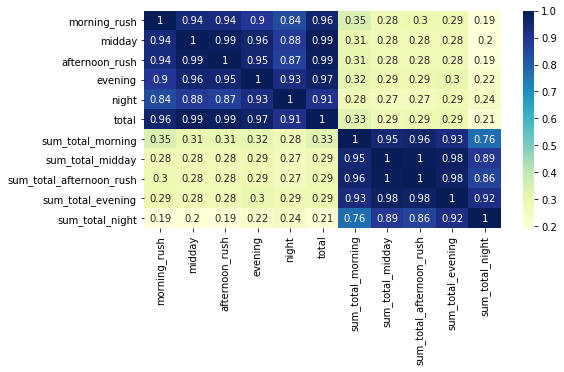

In [23]:
# Heatmap of correlation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(8,4))
sns.heatmap(data[['morning_rush', 'midday', 'afternoon_rush', 'evening','night','total','sum_total_morning','sum_total_midday'
   ,'sum_total_afternoon_rush','sum_total_evening','sum_total_night','st_width','bike_lane']].corr(), annot=True, cmap="YlGnBu")
plt.show()

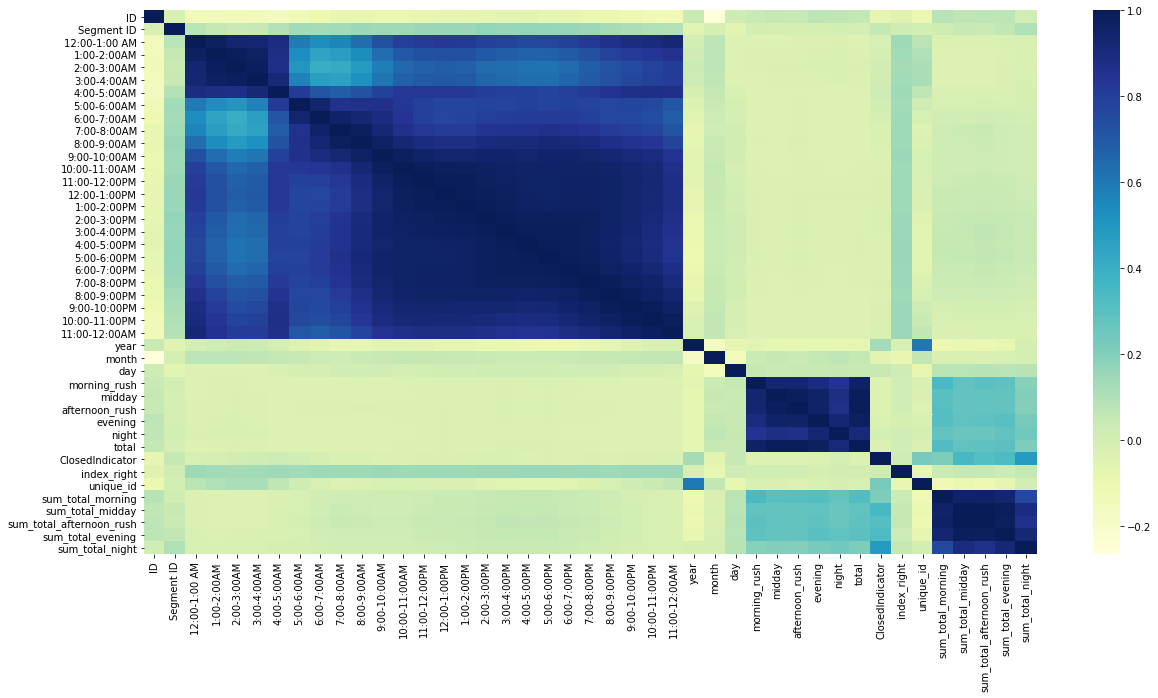

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

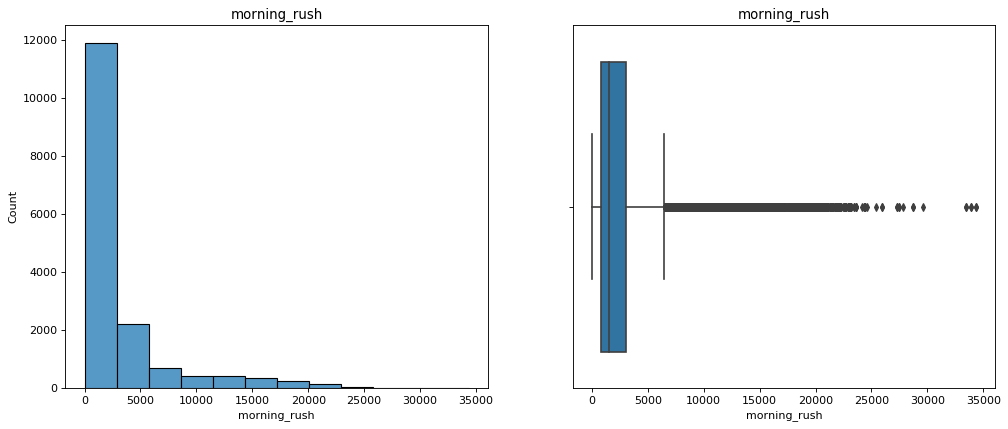

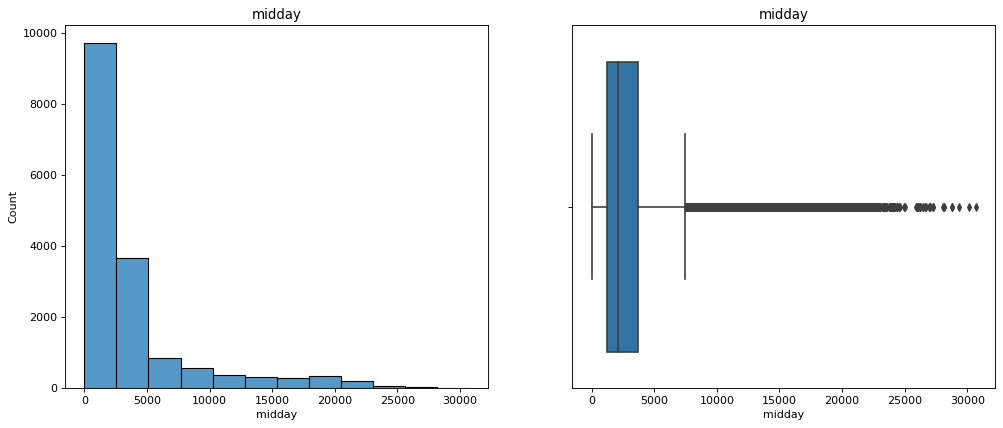

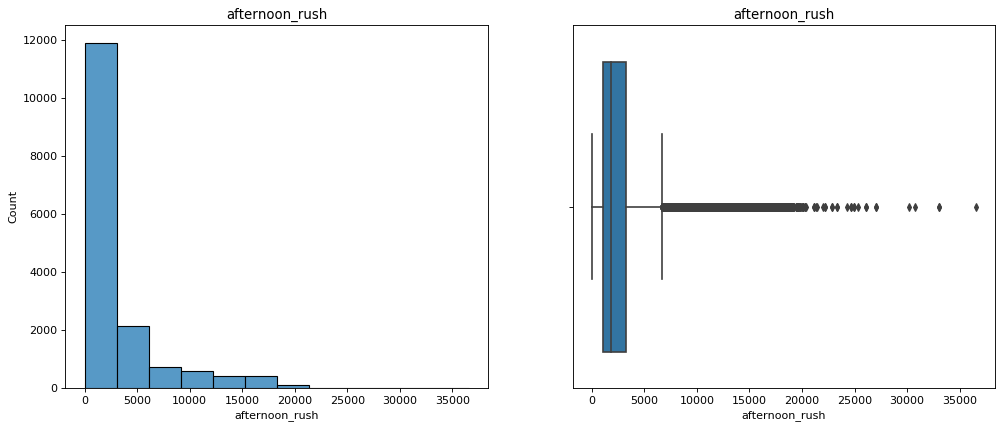

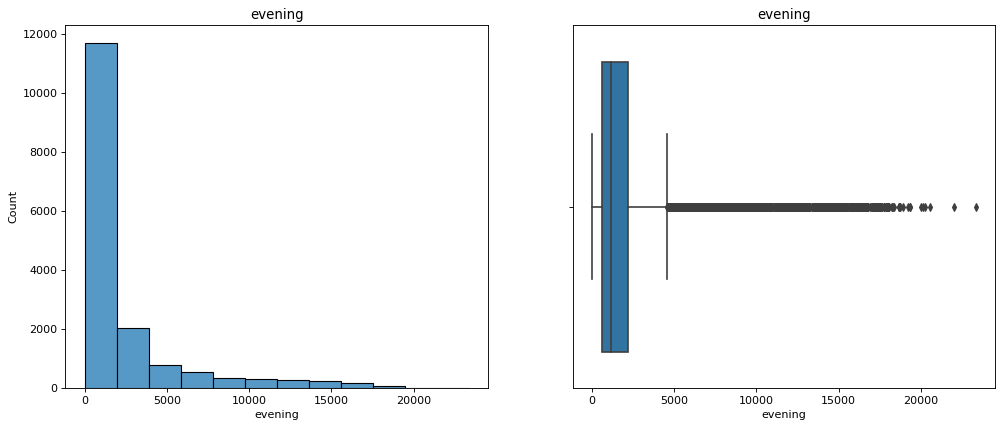

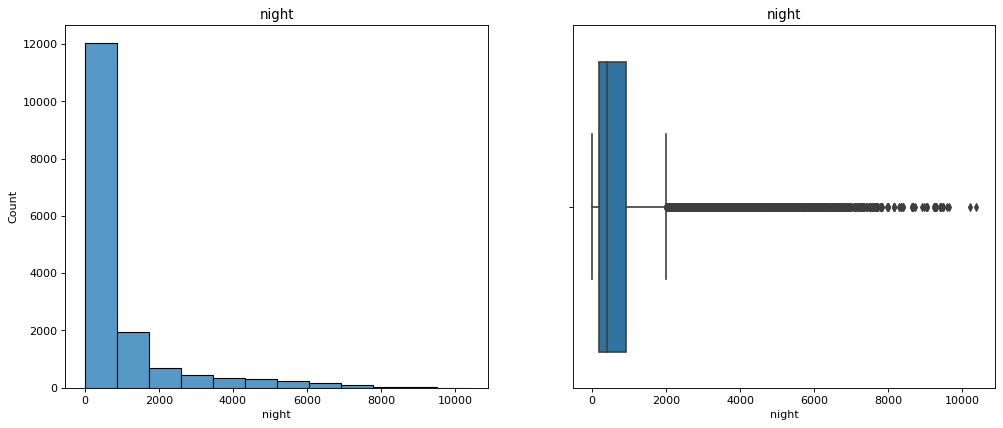

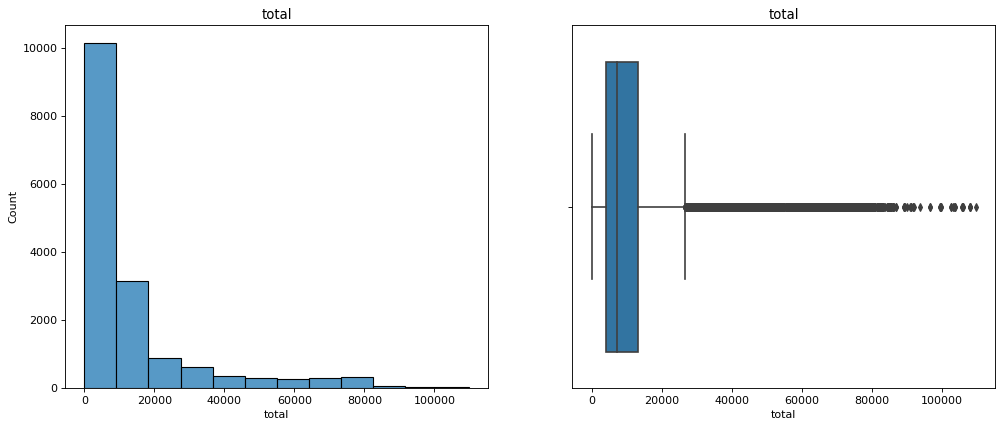

In [138]:
for i in range(30,36):
    figure(figsize=(15, 6), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x=  data.iloc[:,i], bins = 12)
    plt.title(data.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = data.iloc[:,i])
    plt.title(data.columns[i])
    plt.show()

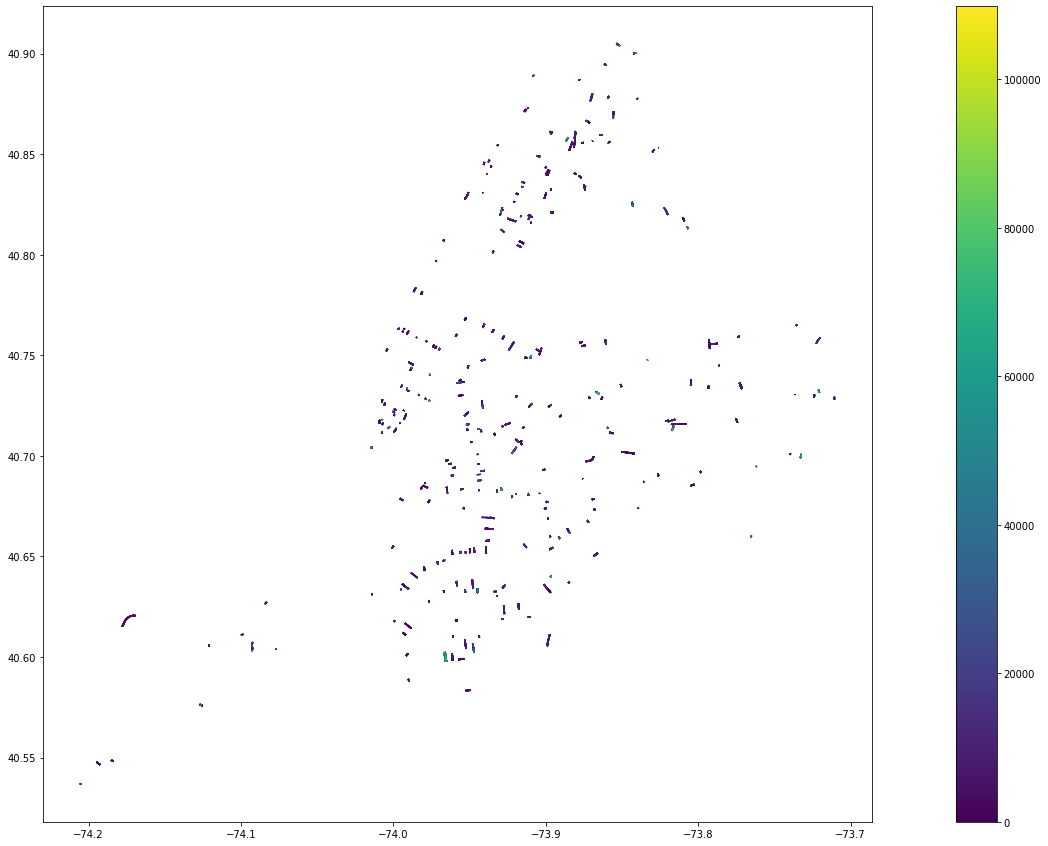

In [20]:
data.plot(column='total', figsize=(30, 15), legend=True)

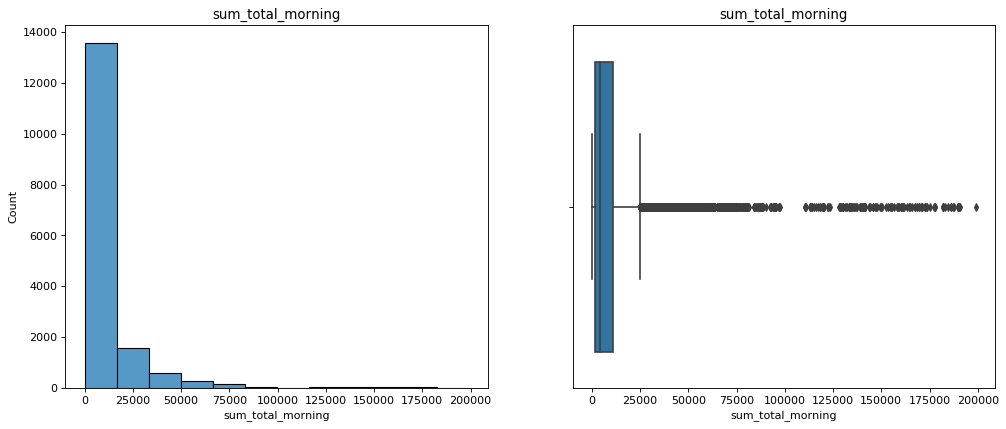

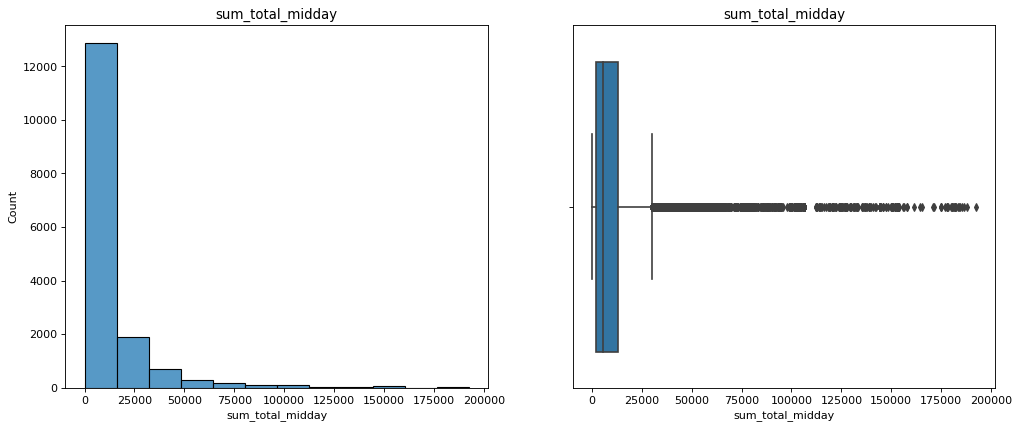

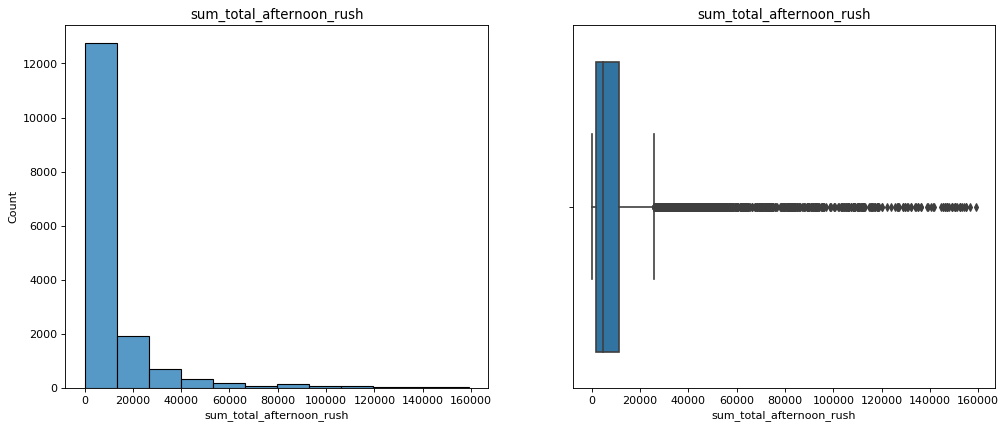

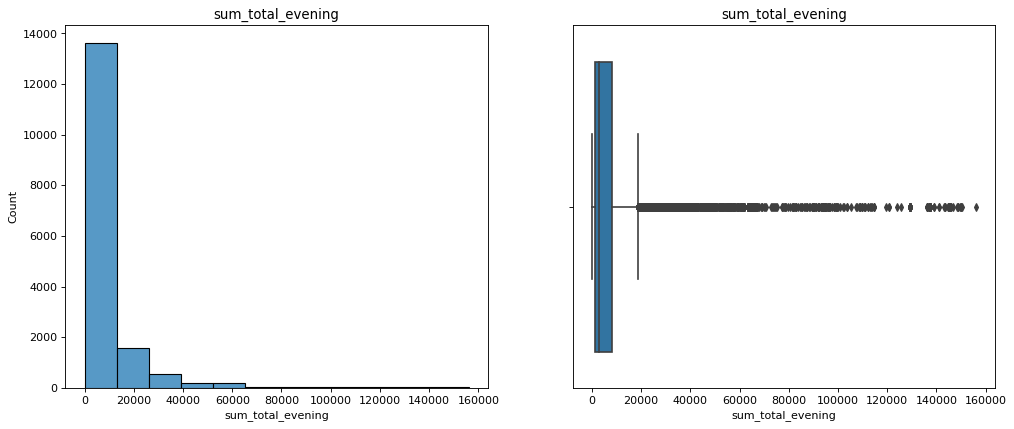

In [139]:
for i in range(-6,-2):
    figure(figsize=(15, 6), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x=  data.iloc[:,i], bins = 12)
    plt.title(data.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = data.iloc[:,i])
    plt.title(data.columns[i])
    plt.show()
    
# figure(figsize=(15, 6), dpi=80)
# plt.subplot(1,2,1)
# sns.histplot(x = data.iloc[:,-2], bins= 12)
# plt.title(df.columns[-2])
# plt.subplot(1,2,2)
# sns.boxplot(x = data.iloc[:,-2])
# plt.title(data.columns[-2])
# plt.show()

<Figure size 1440x288 with 0 Axes>

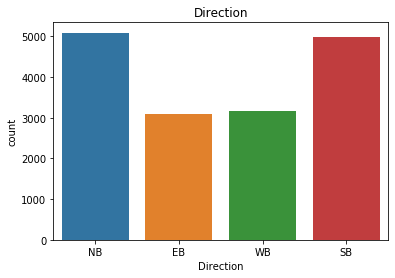

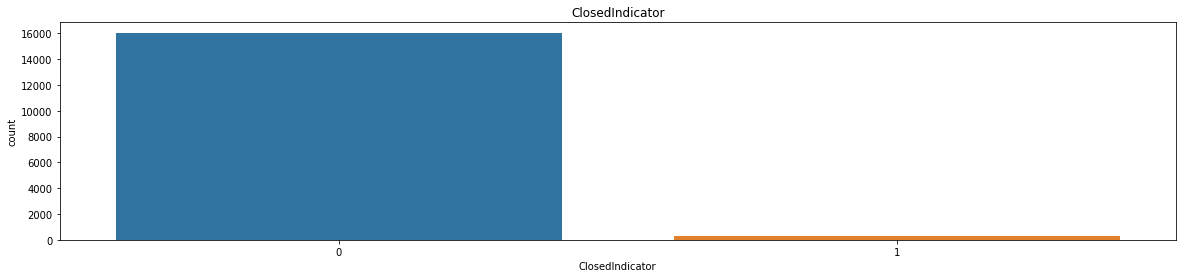

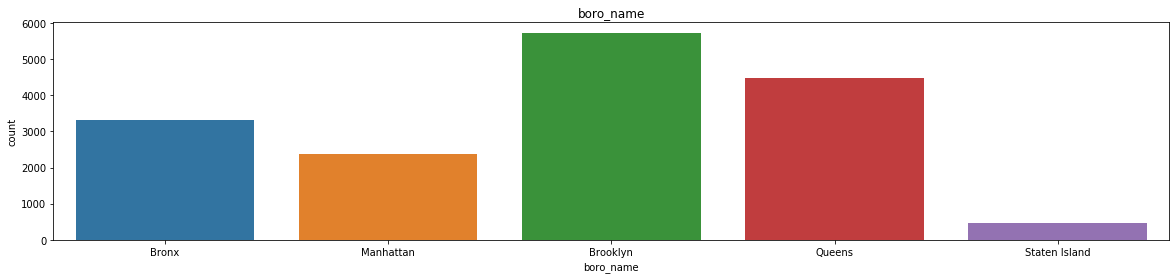

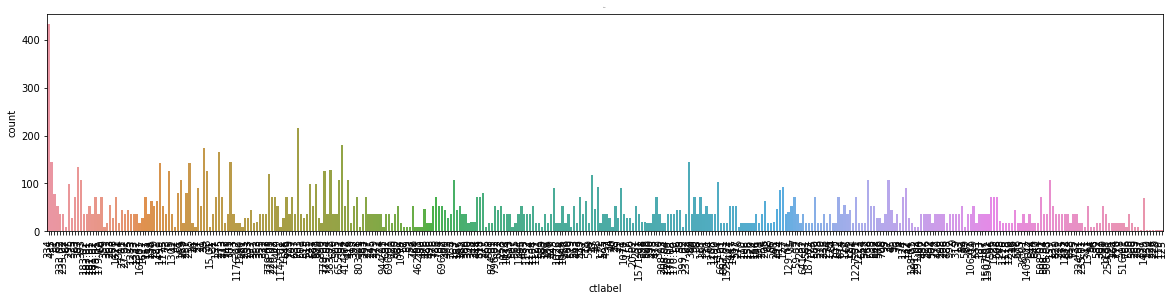

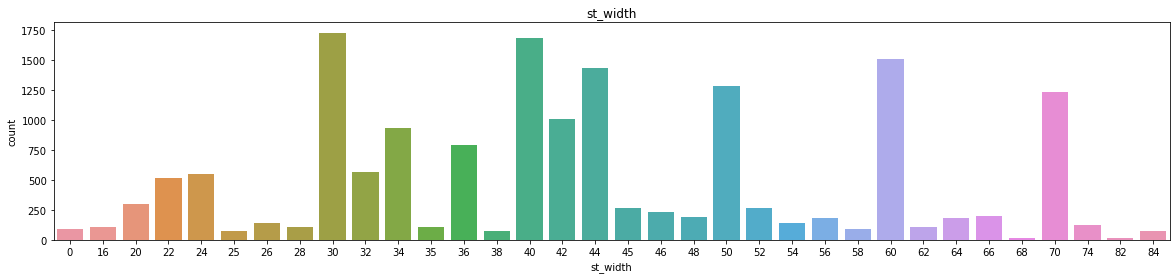

<Figure size 1440x288 with 0 Axes>

In [140]:
# Plot categorical data
sns.countplot(x = data['Direction'])
plt.title('Direction')
figure(figsize=(20, 4))

sns.countplot(x = data['ClosedIndicator'])
plt.title('ClosedIndicator')
figure(figsize=(20, 4))

sns.countplot(x = data['boro_name'])
plt.title('boro_name')
figure(figsize=(20, 4))

p = sns.countplot(x = data['ctlabel'])
plt.xticks(rotation=90)
plt.title('ctlabel', fontsize=1)
figure(figsize=(20, 4))

sns.countplot(x = data['st_width'])
plt.title('st_width')
figure(figsize=(20, 4))


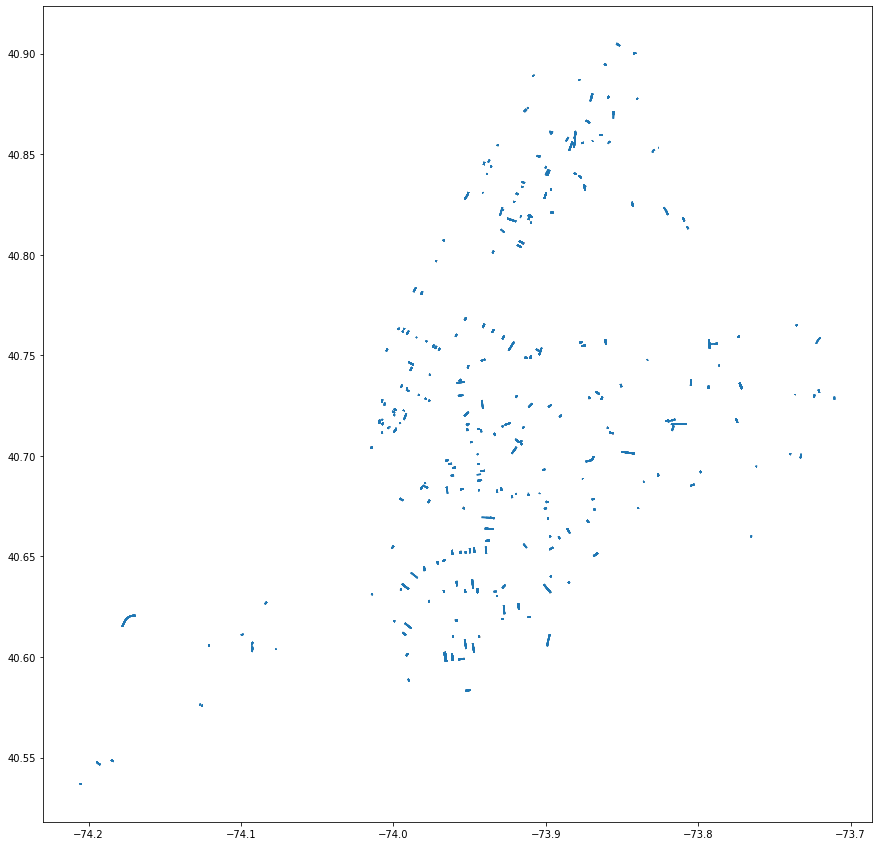

In [141]:
p = data.plot(figsize=(30, 15))

In [15]:
#handle data types
# data.year = pd.to_datetime(data["year"], format="%Y")

# data.month = pd.to_datetime(data["month"], format="%m")

# data.day = pd.to_datetime(data["day"], format="%d")

In [16]:
# plot traffic volume over time
# for i in data.iloc[:33:38].columns:
#     fig, axes = plt.subplots(1, 1,figsize=(10,4))
#     sns.lineplot(data=data, x="year", y= i)

# Log Transform

In [32]:
import numpy as np 
data['morning_rush'] = np.log(data['morning_rush'])
data['midday'] = np.log(data['midday'])
data['afternoon_rush'] = np.log(data['afternoon_rush'])
data['evening'] = np.log(data['evening'])
data['night'] = np.log(data['night'])
data['total'] = np.log(data['total'])
data['sum_total_morning'] = np.log(data['sum_total_morning'])
data['sum_total_midday'] = np.log(data['sum_total_midday'])
data['sum_total_afternoon_rush'] = np.log(data['sum_total_afternoon_rush'])
data['sum_total_evening'] = np.log(data['sum_total_evening'])
data['sum_total_night'] = np.log(data['sum_total_night'])

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([2.000e+00, 1.600e+01, 9.500e+01, 4.080e+02, 1.674e+03, 3.770e+03,
        4.686e+03, 3.146e+03, 1.473e+03, 2.650e+02]),
 array([ 1.79175947,  2.83275735,  3.87375523,  4.91475311,  5.95575099,
         6.99674887,  8.03774675,  9.07874463, 10.11974251, 11.16074039,
        12.20173827]),
 <a list of 10 Patch objects>)

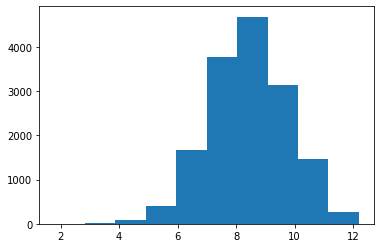

In [11]:
from matplotlib import pyplot as plt
plt.hist(data['sum_total_morning'][np.isfinite(data['sum_total_morning'])].values)

In [33]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)


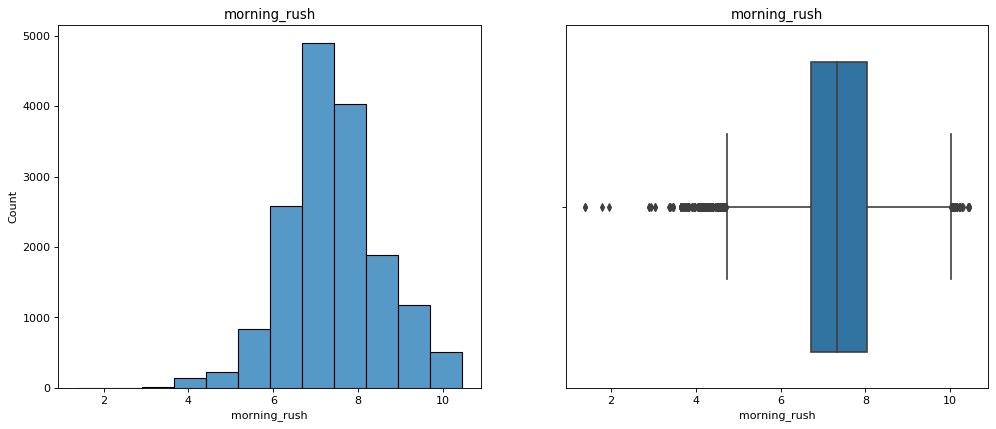

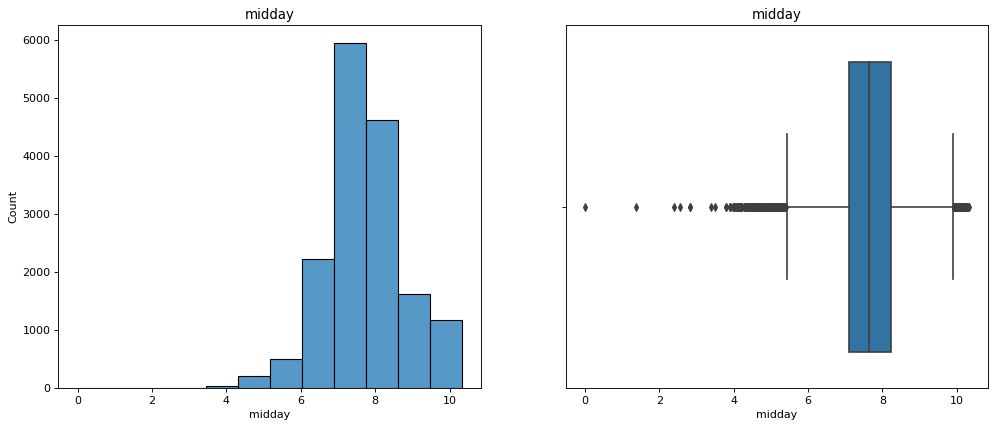

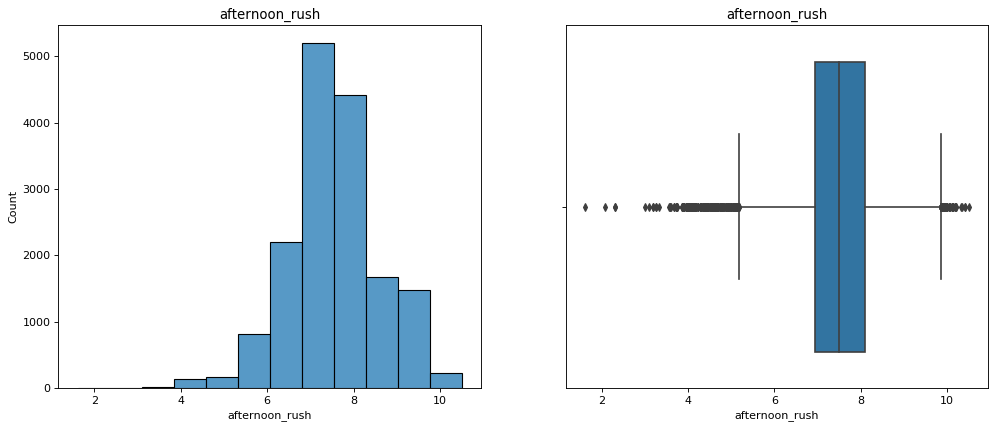

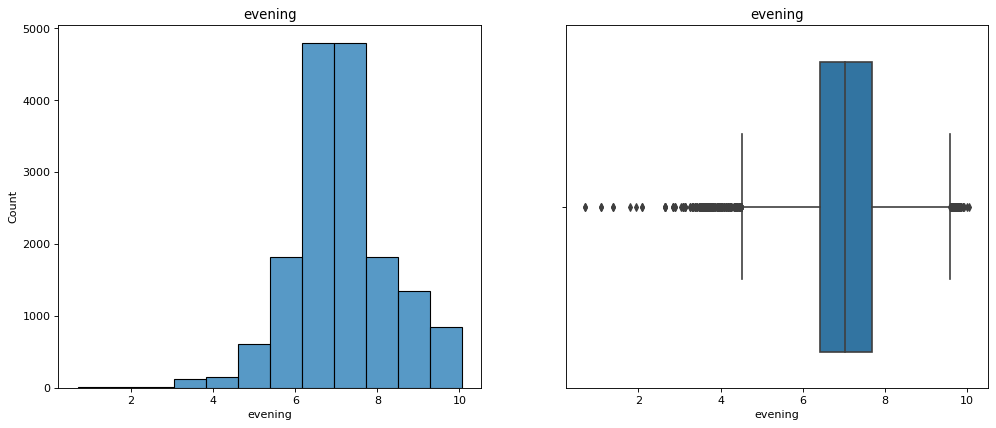

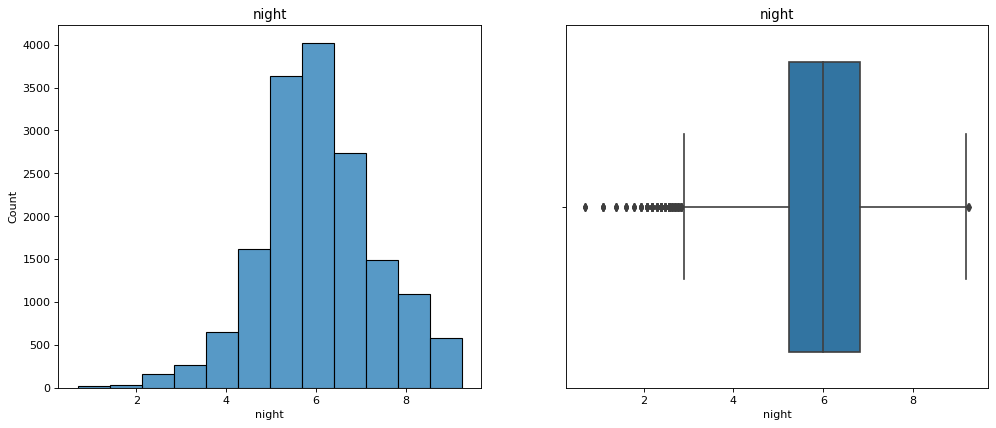

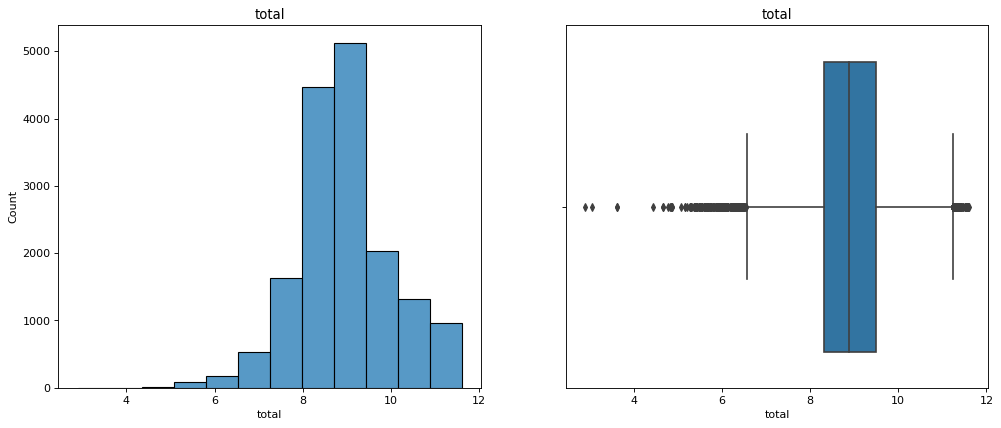

In [147]:
for i in range(30,36):
    figure(figsize=(15, 6), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x=  data.iloc[:,i], bins = 12)
    plt.title(data.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = data.iloc[:,i])
    plt.title(data.columns[i])
    plt.show()

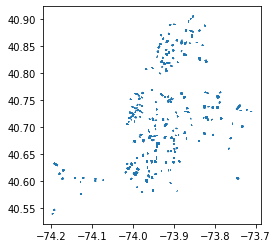

In [231]:
data.plot()

In [14]:
geo_data = gpd.GeoDataFrame(data, geometry='geometry')
geo_data.to_file("predicted_traffic2.geojson", driver='GeoJSON')

In [15]:
geo_data.to_csv('log_transform.csv')

# Standardize data

In [34]:
df2=data.dropna()

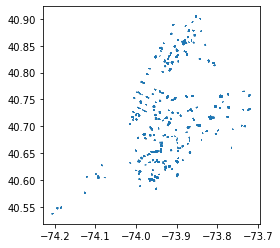

In [153]:
df2.plot()

In [208]:
df_export = df2[['morning_rush', 'midday', 'afternoon_rush', 'evening','night','total','sum_total_morning','sum_total_midday'
   ,'sum_total_afternoon_rush','sum_total_evening','sum_total_night','st_width','bike_lane', 'Direction','boro_name','ClosedIndicator',
                 'roadway_type', 'unique_id','geometry']]

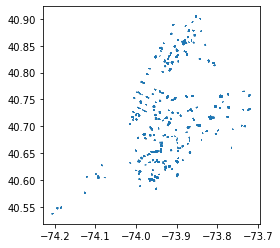

In [209]:
df_export.plot()

In [210]:
geo_data = gpd.GeoDataFrame(df_export, geometry='geometry')
geo_data.to_file("predicted_traffic.geojson", driver='GeoJSON')

In [35]:
df_num = df2[['morning_rush', 'midday', 'afternoon_rush', 'evening','night','total','sum_total_morning','sum_total_midday'
   ,'sum_total_afternoon_rush','sum_total_evening','sum_total_night','st_width','bike_lane']]

In [36]:
# standarize the numeric variables
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_num)
scaled = scaler.transform(df_num)
# change the scaled data to data frame
df_num_new=pd.DataFrame(scaled,columns=df_num.columns)

In [37]:
df_num_new.round(6)

,morning_rush,midday,afternoon_rush,evening,night,total,sum_total_morning,sum_total_midday,sum_total_afternoon_rush,sum_total_evening,sum_total_night,st_width,bike_lane
0,-0.304309,0.115891,0.158391,0.163625,0.396646,0.052696,1.295850,1.399856,1.400681,1.270665,1.046624,-0.797536,-0.517786
1,0.258498,0.544766,0.296792,0.427422,0.458635,0.381114,2.038650,2.106247,2.127779,2.019990,1.825062,-0.797536,-0.517786
2,1.330559,1.735946,1.542948,1.418856,1.025894,1.516884,2.119233,2.107151,2.163265,2.080952,1.963910,-0.797536,-0.517786
3,-0.886237,-0.768726,-0.819930,-0.516112,-0.470881,-0.788600,1.465228,1.634216,1.645239,1.592291,1.505975,-0.797536,-0.517786
4,0.126709,0.324421,0.258116,0.471833,0.793212,0.323178,1.807778,1.962770,2.018116,1.860865,1.826691,-0.797536,-0.517786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15479,-3.335282,-3.169674,-3.464160,-3.059075,-2.715128,-3.346021,2.025730,2.505596,2.380291,2.668152,2.981545,1.267821,0.288469
15480,-3.335282,-3.169674,-3.464160,-3.059075,-2.715128,-3.346021,2.025730,2.505596,2.380291,2.668152,2.981545,1.267821,0.288469
15481,-3.335282,-3.169674,-3.464160,-3.059075,-2.715128,-3.346021,2.025730,2.505596,2.380291,2.668152,2.981545,1.267821,0.288469
15482,-3.335282,-3.169674,-3.464160,-3.059075,-2.715128,-3.346021,2.025730,2.505596,2.380291,2.668152,2.981545,1.267821,0.288469


In [38]:
df_cat = df2[['Direction','boro_name','ClosedIndicator','roadway_type']]

In [39]:
# change all categorical variables to object data type
df_cat=df_cat.astype('str') 
df_cat_new=pd.get_dummies(df_cat, prefix=None).drop(['ClosedIndicator_0'],axis=1)

In [40]:
# combine all transformed data into new data frame
df_new=pd.concat([df_num_new,df_cat_new],axis=1,join='inner')
# check result
df_new.head()

,morning_rush,midday,afternoon_rush,evening,night,total,sum_total_morning,sum_total_midday,sum_total_afternoon_rush,sum_total_evening,...,Direction_SB,Direction_WB,boro_name_Bronx,boro_name_Brooklyn,boro_name_Manhattan,boro_name_Queens,boro_name_Staten Island,ClosedIndicator_1,roadway_type_1,roadway_type_2
0,-0.304309,0.115891,0.158391,0.163625,0.396646,0.052696,1.295850,1.399856,1.400681,1.270665,...,0,0,1,0,0,0,0,0,0,1
1,0.258498,0.544766,0.296792,0.427422,0.458635,0.381114,2.038650,2.106247,2.127779,2.019990,...,0,0,1,0,0,0,0,0,0,1
2,1.330559,1.735946,1.542948,1.418856,1.025894,1.516884,2.119233,2.107151,2.163265,2.080952,...,0,0,1,0,0,0,0,0,0,1
3,-0.886237,-0.768726,-0.819930,-0.516112,-0.470881,-0.788600,1.465228,1.634216,1.645239,1.592291,...,0,0,1,0,0,0,0,0,0,1
4,0.126709,0.324421,0.258116,0.471833,0.793212,0.323178,1.807778,1.962770,2.018116,1.860865,...,0,0,1,0,0,0,0,0,0,1


In [200]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14675 entries, 0 to 15483
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   morning_rush              14675 non-null  float64
 1   midday                    14675 non-null  float64
 2   afternoon_rush            14675 non-null  float64
 3   evening                   14675 non-null  float64
 4   night                     14675 non-null  float64
 5   total                     14675 non-null  float64
 6   sum_total_morning         14675 non-null  float64
 7   sum_total_midday          14675 non-null  float64
 8   sum_total_afternoon_rush  14675 non-null  float64
 9   sum_total_evening         14675 non-null  float64
 10  sum_total_night           14675 non-null  float64
 11  st_width                  14675 non-null  float64
 12  bike_lane                 14675 non-null  float64
 13  unique_id                 14675 non-null  int64  
 14  Direct

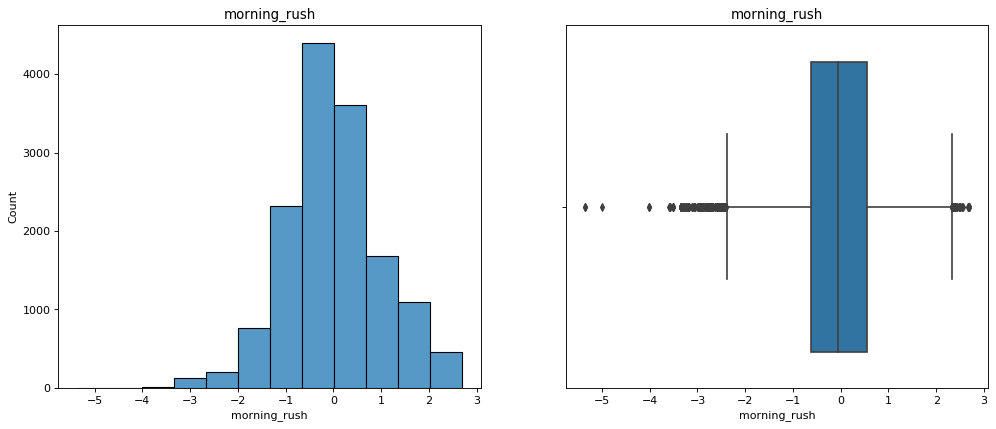

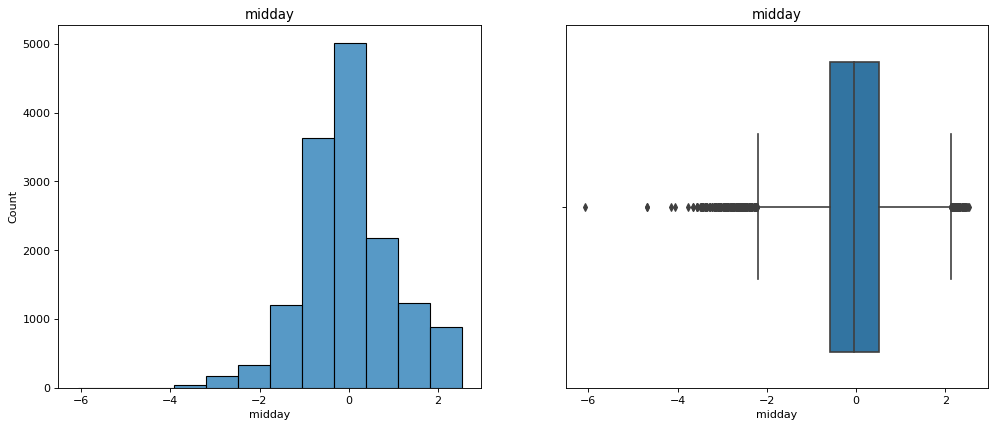

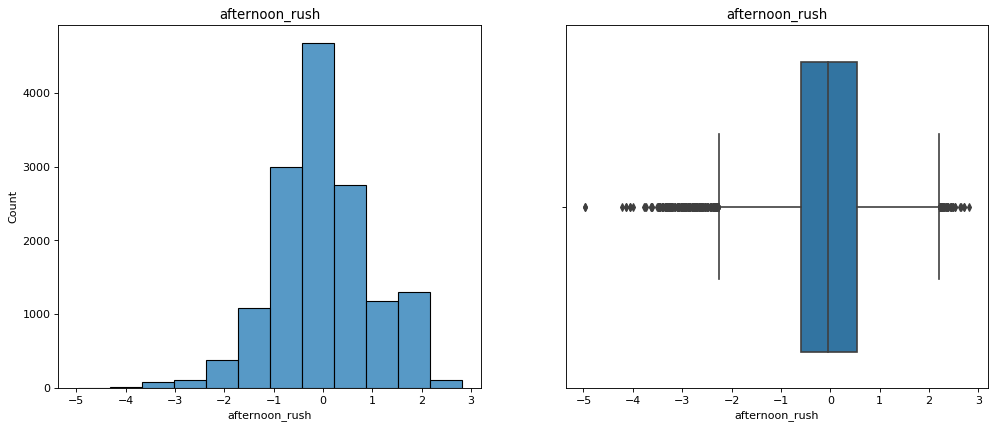

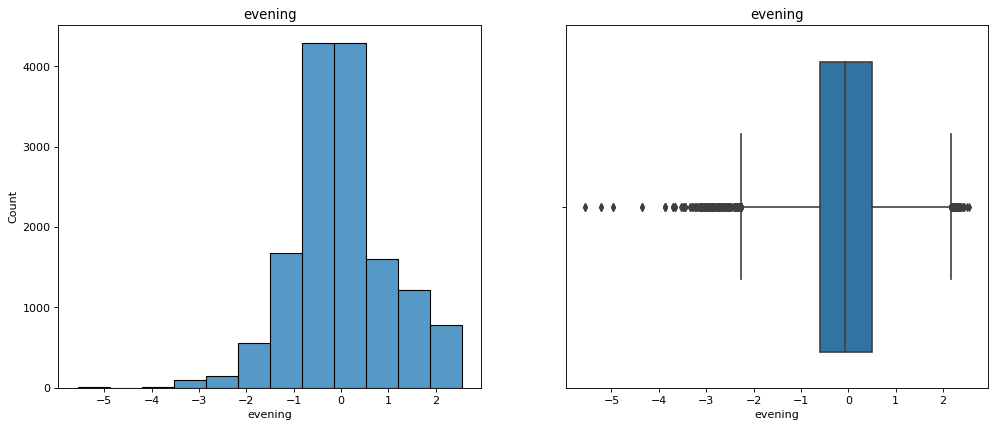

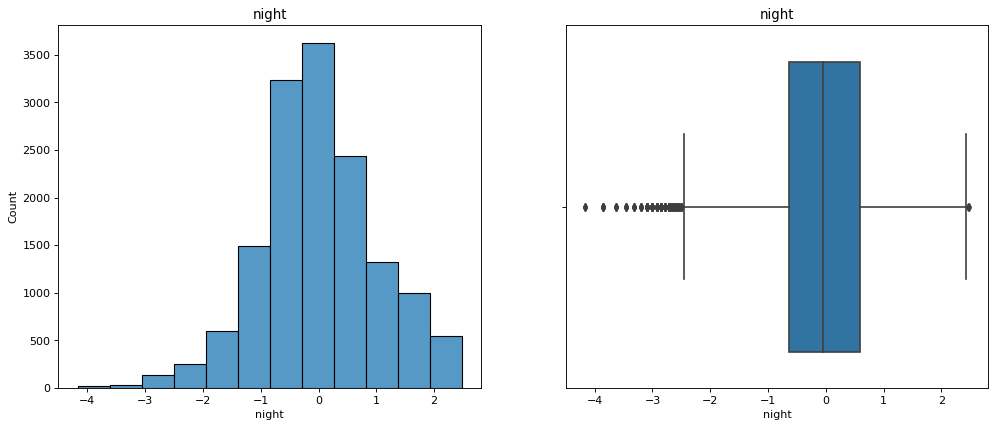

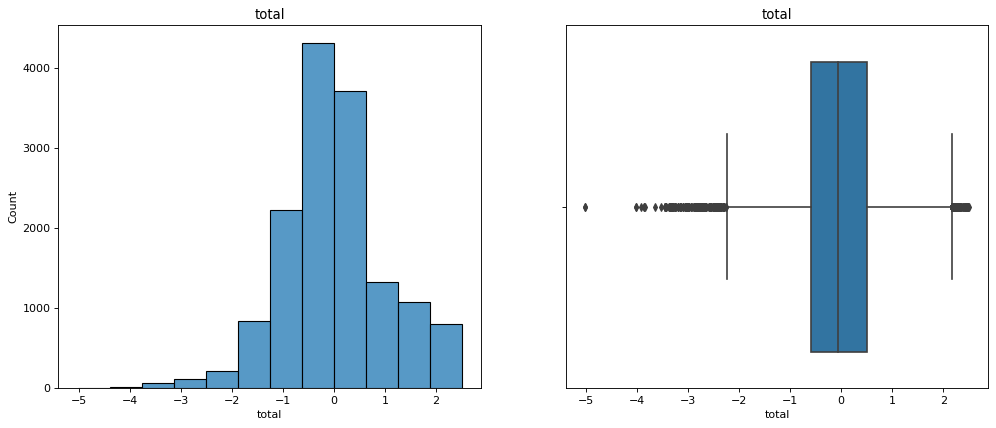

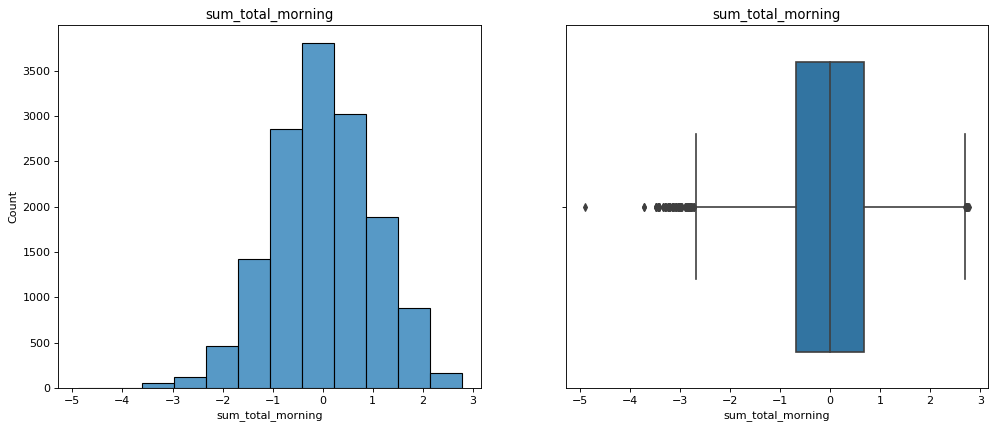

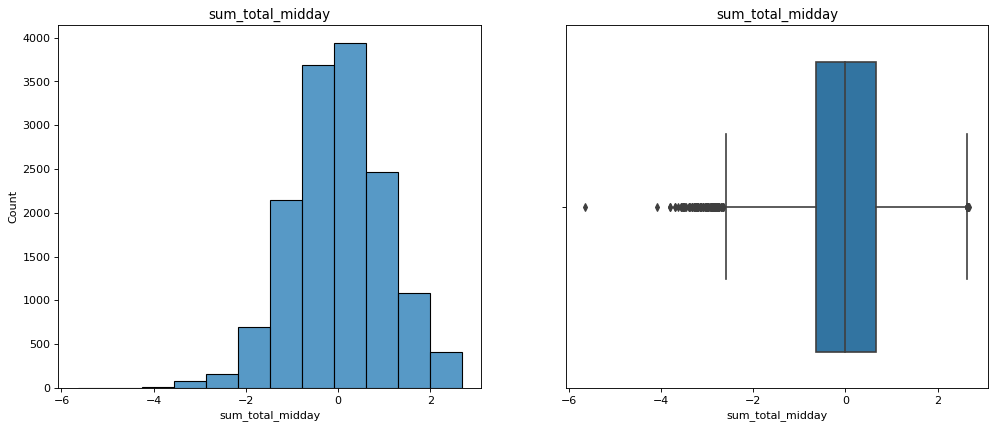

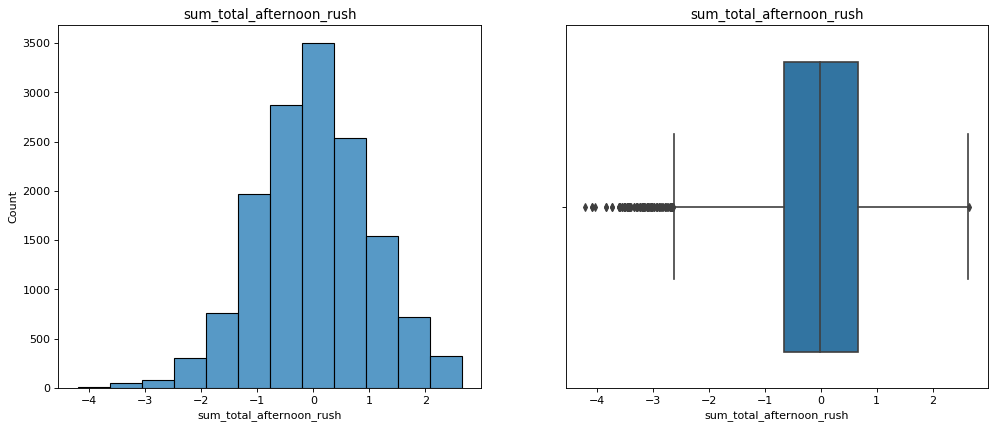

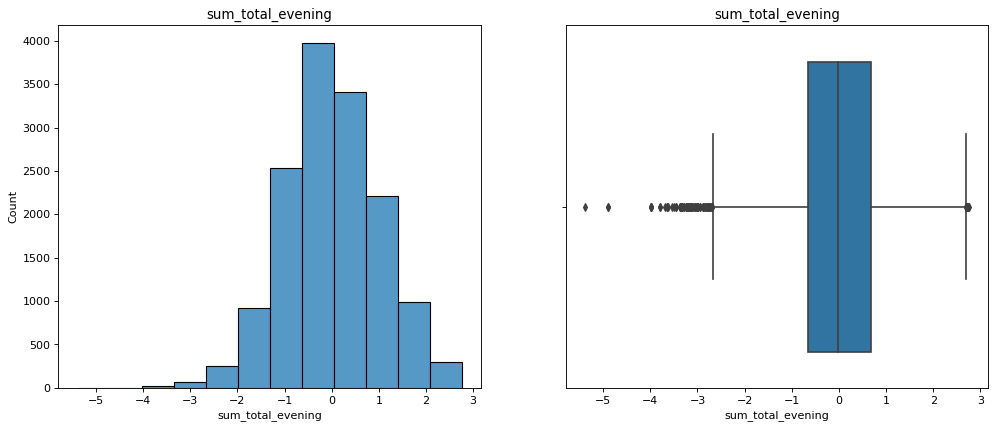

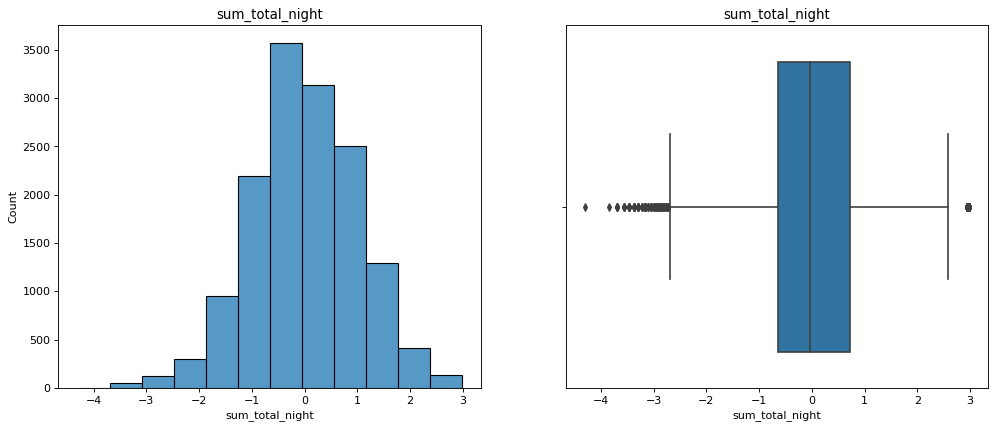

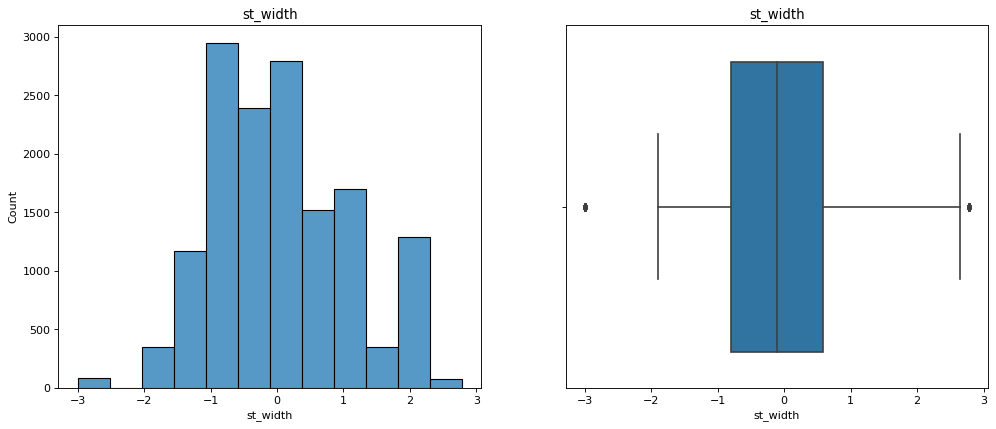

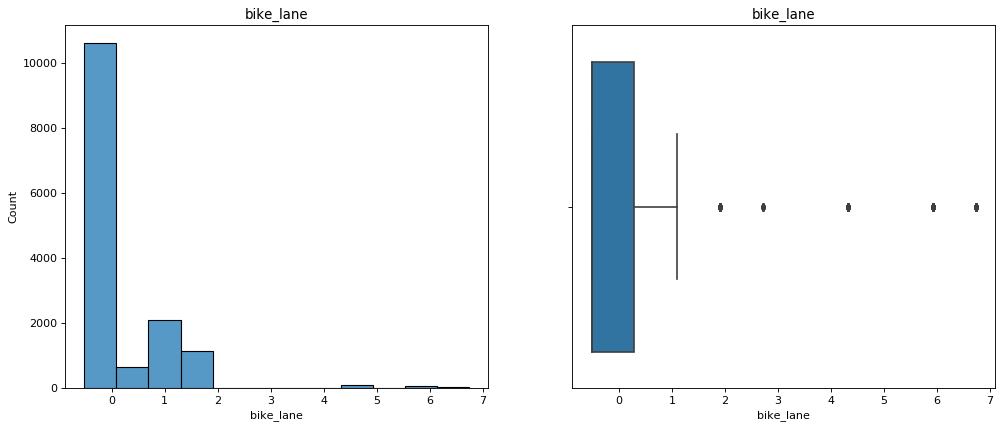

In [111]:
for i in range(0,13):
    figure(figsize=(15, 6), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x=  df_new.iloc[:,i], bins = 12)
    plt.title(df_new.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df_new.iloc[:,i])
    plt.title(df_new.columns[i])
    plt.show()

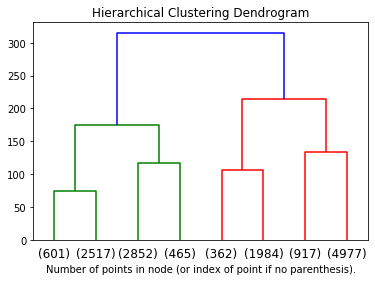

In [41]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Apply hierarchy clustering on df_new
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_new)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top two levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

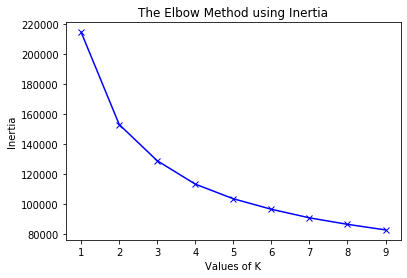

In [43]:
'''*****************************************************************
Cited from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
*****************************************************************'''
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

X=df_new

inertias = []
mapping = {}
K = range(1, 10)

for k in K:
# Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [44]:
'''***************************************************************************
Cited from https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb
*******************************************************************************'''
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
print(silhouette_scores)

[0.2487207793776853, 0.2004704372807573, 0.1862726540063362, 0.17503417837378962, 0.1642655519593672, 0.17139740789825092, 0.15536604655199834, 0.15580601850806872]


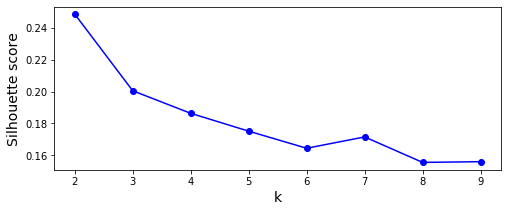

In [46]:
# plot the silhouette_scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [47]:
df_clean = df_new.dropna()

In [50]:
from sklearn.cluster import KMeans
# apply k=2 to label the observations
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_new)
# add a new column 'Revenue' in the dataframe
df_new['Closed_Street']=pd.DataFrame(kmeans.predict(df_new))
df_new.head()

,morning_rush,midday,afternoon_rush,evening,night,total,sum_total_morning,sum_total_midday,sum_total_afternoon_rush,sum_total_evening,...,Direction_WB,boro_name_Bronx,boro_name_Brooklyn,boro_name_Manhattan,boro_name_Queens,boro_name_Staten Island,ClosedIndicator_1,roadway_type_1,roadway_type_2,Closed_Street
0,-0.304309,0.115891,0.158391,0.163625,0.396646,0.052696,1.295850,1.399856,1.400681,1.270665,...,0,1,0,0,0,0,0,0,1,0.0
1,0.258498,0.544766,0.296792,0.427422,0.458635,0.381114,2.038650,2.106247,2.127779,2.019990,...,0,1,0,0,0,0,0,0,1,0.0
2,1.330559,1.735946,1.542948,1.418856,1.025894,1.516884,2.119233,2.107151,2.163265,2.080952,...,0,1,0,0,0,0,0,0,1,0.0
3,-0.886237,-0.768726,-0.819930,-0.516112,-0.470881,-0.788600,1.465228,1.634216,1.645239,1.592291,...,0,1,0,0,0,0,0,0,1,0.0
4,0.126709,0.324421,0.258116,0.471833,0.793212,0.323178,1.807778,1.962770,2.018116,1.860865,...,0,1,0,0,0,0,0,0,1,0.0


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Traffic Impact')]

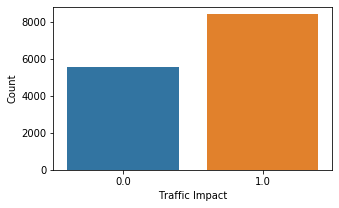

In [51]:
# plot the clustered result
figure(figsize=(5, 3))
cx=sns.barplot(x = df_new.iloc[:,-1].value_counts().index, y = df_new.iloc[:,-1].value_counts())
cx.set(xlabel='Traffic Impact', ylabel='Count')

In [52]:
df_new.to_csv('closed.csv')

In [102]:
# show the exact counts
df_clean.iloc[:,-1].value_counts()

1.0    8386
0.0    5530
Name: Closed_Street, dtype: int64

(array([2.000e+00, 8.000e+00, 1.150e+02, 1.930e+02, 9.160e+02, 2.970e+03,
        5.451e+03, 2.685e+03, 1.353e+03, 9.820e+02]),
 array([-5.02002208, -4.26727638, -3.51453069, -2.761785  , -2.0090393 ,
        -1.25629361, -0.50354791,  0.24919778,  1.00194347,  1.75468917,
         2.50743486]),
 <a list of 10 Patch objects>)

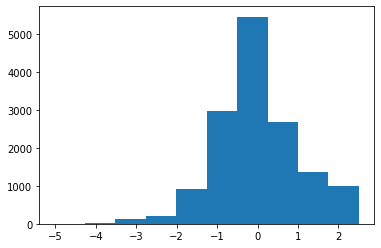

In [37]:
plt.hist(df_clean['total'][np.isfinite(df_clean['total'])].values)

In [38]:
print(df_clean['total'].mean())
print(df_clean['total'].var())

-0.0038919639934424
1.0032022988284381


In [39]:
df2=df_clean.dropna()
df2

,morning_rush,midday,afternoon_rush,evening,night,total,sum_total_morning,sum_total_midday,sum_total_afternoon_rush,sum_total_evening,...,Direction_WB,boro_name_Bronx,boro_name_Brooklyn,boro_name_Manhattan,boro_name_Queens,boro_name_Staten Island,ClosedIndicator_1,roadway_type_1,roadway_type_2,Closed_Street
0,-0.304309,0.115891,0.158391,0.163625,0.396646,0.052696,1.295850,1.399856,1.400681,1.270665,...,0,1,0,0,0,0,0,0,1,0.0
1,0.258498,0.544766,0.296792,0.427422,0.458635,0.381114,2.038650,2.106247,2.127779,2.019990,...,0,1,0,0,0,0,0,0,1,0.0
2,1.330559,1.735946,1.542948,1.418856,1.025894,1.516884,2.119233,2.107151,2.163265,2.080952,...,0,1,0,0,0,0,0,0,1,0.0
3,-0.886237,-0.768726,-0.819930,-0.516112,-0.470881,-0.788600,1.465228,1.634216,1.645239,1.592291,...,0,1,0,0,0,0,0,0,1,0.0
4,0.126709,0.324421,0.258116,0.471833,0.793212,0.323178,1.807778,1.962770,2.018116,1.860865,...,0,1,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,-1.531510,-1.271541,-1.683481,-1.704294,-1.637134,-1.579568,0.965757,1.278172,1.157730,1.014310,...,0,0,1,0,0,0,0,1,0,1.0
14671,-0.227314,0.148965,-0.148549,-0.358816,-0.229034,-0.138471,-0.055805,-0.077926,-0.211995,-0.509016,...,0,0,1,0,0,0,0,1,0,1.0
14672,-0.227314,0.148965,-0.148549,-0.358816,-0.229034,-0.138471,0.520992,0.766200,0.561675,0.311517,...,0,0,1,0,0,0,0,1,0,1.0
14673,-2.174699,-1.436978,-1.617616,-1.772372,-1.607786,-1.747793,-0.339945,-0.235655,-0.098023,-0.409074,...,0,0,1,0,0,0,0,1,0,1.0


In [103]:
# indicating explanatory variables and response variables
X=df2.drop(columns=['sum_total_afternoon_rush'])
y=df2['sum_total_afternoon_rush']

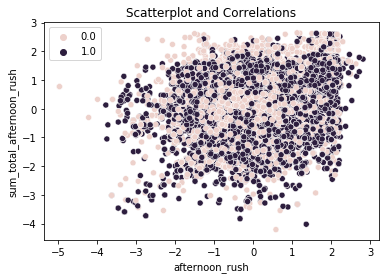

In [53]:
# Scatterplot and Correlations
# Data

# Plot

sns.scatterplot(x=df_new['afternoon_rush'], y=df_new['sum_total_afternoon_rush'], hue=df_clean['Closed_Street'])

# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

In [78]:
'''**********************************
Original code cited from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
*************************************'''
import statsmodels.api as sm
# Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_0 = X[cols]
    # sm requires that have an additional variable with a constant of one
    X_0 = sm.add_constant(X_0)
    model = sm.OLS(y,X_0).fit()
    # selects all as feature variables
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    # iterates and removes variables that are not a good fit
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['morning_rush', 'midday', 'afternoon_rush', 'evening', 'sum_total_morning', 'sum_total_midday', 'sum_total_evening', 'sum_total_night', 'st_width', 'Direction_EB', 'boro_name_Bronx', 'boro_name_Manhattan', 'ClosedIndicator_1', 'Closed_Street']


/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/alejandrazapa

In [79]:
X = X[['morning_rush', 'midday', 'afternoon_rush', 'evening', 'sum_total_morning', 'sum_total_midday', 'sum_total_evening', 'sum_total_night', 'st_width', 'Direction_EB', 'boro_name_Bronx', 'boro_name_Manhattan', 'ClosedIndicator_1', 'Closed_Street']]

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

SupportVectorRegModel = SVR(kernel='rbf', C=10, gamma=1)
SupportVectorRegModel.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [113]:
y_pred = SupportVectorRegModel.predict(X_test)

In [114]:
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.24050816953518428

In [115]:
df_final =  pd.concat([y_test,X_test], axis=0, ignore_index=True)

In [122]:
df_final['geometry'] = df2['geometry']

In [123]:
geo_data = gpd.GeoDataFrame(df_final, geometry='geometry')
geo_data.to_file("predicted_traffic.geojson", driver='GeoJSON')

AttributeError: 'int' object has no attribute 'encode'

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# setting a random forest model
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

regr.fit(X_train, y_train)

y_pred_3= regr.predict(X_test)

mse= mean_squared_error(y_test, y_pred_3)
rmse = np.sqrt(mse)
rmse

0.34866484688374033

In [86]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
# Apply the linear regression model on the PCs
linear_reg = sm.OLS(y_train, X_train).fit()
# predict on the testing group

y_pred_1= linear_reg.predict(X_test)
# print model summary
print(linear_reg_2.summary())

# the RMSE of model
d=mean_squared_error(y_pred_1,y_test)
np.sqrt(d)

                            OLS Regression Results                            
Dep. Variable:      sum_total_morning   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.943e+04
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:30:04   Log-Likelihood:                 2992.2
No. Observations:               11132   AIC:                            -5950.
Df Residuals:                   11115   BIC:                            -5826.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
morning_rush            

0.10710098720341397

In [104]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.17795124717463826
RMSE value for k=  2 is: 0.16214383364968266
RMSE value for k=  3 is: 0.1562704743601372
RMSE value for k=  4 is: 0.15389649336704275
RMSE value for k=  5 is: 0.15393718950074806
RMSE value for k=  6 is: 0.15504451131431302
RMSE value for k=  7 is: 0.1549956708435281
RMSE value for k=  8 is: 0.15612563153176678
RMSE value for k=  9 is: 0.1569824978137412
RMSE value for k=  10 is: 0.15664247345749105
RMSE value for k=  11 is: 0.15710678672670597
RMSE value for k=  12 is: 0.15624213003023218
RMSE value for k=  13 is: 0.15650717660367608
RMSE value for k=  14 is: 0.1566498443141638
RMSE value for k=  15 is: 0.1571290585837578
RMSE value for k=  16 is: 0.15782652647421755
RMSE value for k=  17 is: 0.15835498620100488
RMSE value for k=  18 is: 0.15867467927687634
RMSE value for k=  19 is: 0.15910975318106352
RMSE value for k=  20 is: 0.15959774048265832


In [88]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [106]:
X.dtypes

morning_rush               float64
midday                     float64
afternoon_rush             float64
evening                    float64
night                      float64
total                      float64
sum_total_morning          float64
sum_total_midday           float64
sum_total_evening          float64
sum_total_night            float64
st_width                   float64
bike_lane                  float64
Direction_EB                 uint8
Direction_NB                 uint8
Direction_SB                 uint8
Direction_WB                 uint8
boro_name_Bronx              uint8
boro_name_Brooklyn           uint8
boro_name_Manhattan          uint8
boro_name_Queens             uint8
boro_name_Staten Island      uint8
ClosedIndicator_1            uint8
roadway_type_1               uint8
roadway_type_2               uint8
Closed_Street              float64
dtype: object

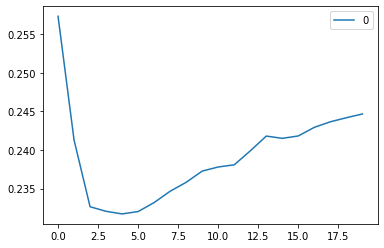

In [55]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [60]:
# https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958
import statsmodels.api as sm
# Fit poisson model given PCA/ standardized X training set, and y training set
poi_model = sm.GLM(y, X, family=sm.families.Poisson()).fit(method="lbfgs")
y_pred= poi_model.predict(X_test)

print(poi_model.summary())

# the RMSE of model
e=mean_squared_error(y_pred,y_test)
np.sqrt(e)

                 Generalized Linear Model Regression Results                  
Dep. Variable:      sum_total_morning   No. Observations:                13916
Model:                            GLM   Df Residuals:                    13899
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                         lbfgs   Log-Likelihood:                 76546.
Date:                Wed, 10 Nov 2021   Deviance:                   4.7234e+05
Time:                        20:57:27   Pearson chi2:                 3.32e+27
No. Iterations:                     0                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
morning_rush            

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1093: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_dis

8.51300520958056

In [58]:
# fit the model in the PCs
nb_reg_2 = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit(method="lbfgs")
y_pred_3=nb_reg_2.predict(X_test)

# print the summary
print(nb_reg_2.summary())

# the RMSE of model
f=mean_squared_error(y_pred_3,y_test)
np.sqrt(f)

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1230: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


ValueError: The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.

In [71]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('svm', make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel = 'linear', gamma = 1))))
    level0.append(('lr', LinearRegression()))

    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['svm'] = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel = 'linear', gamma = 1))
    models['lr'] = LinearRegression()
    models['stacking'] = get_stacking()
    return models

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
print (results)

>svm -0.186 (0.009)
>lr -0.186 (0.009)
>stacking -0.186 (0.009)
[array([-0.18301906, -0.21149155, -0.18693739, -0.18179018, -0.17830403,
       -0.18551615, -0.1889963 , -0.18626624, -0.18540048, -0.17554371,
       -0.18487659, -0.17251238, -0.17908574, -0.18413881, -0.19624048,
       -0.18707004, -0.1821705 , -0.21122795, -0.18087868, -0.18442015,
       -0.18295018, -0.18469588, -0.18664409, -0.19911014, -0.19326461,
       -0.17382477, -0.18647993, -0.18464998, -0.1912623 , -0.18218996]), array([-0.18301019, -0.21065186, -0.18666492, -0.18196193, -0.17834175,
       -0.18515764, -0.18869171, -0.1866051 , -0.18560214, -0.17564778,
       -0.18504645, -0.17226444, -0.1786693 , -0.18417188, -0.19495751,
       -0.18762983, -0.1828669 , -0.21097718, -0.18044178, -0.18464544,
       -0.18341849, -0.1841116 , -0.18712713, -0.19849788, -0.19324266,
       -0.1737941 , -0.18590211, -0.18455979, -0.19148507, -0.18172809]), array([-0.18282962, -0.21145671, -0.18682549, -0.18175406, -0.17814

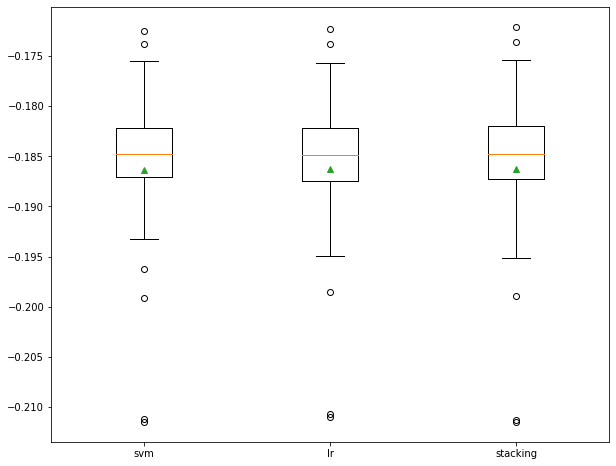

In [72]:
plt.figure(figsize=(10,8))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()